**Breast Cancer Detection Using the KNN Classifier**

Data Set Characteristics: Multivariate,
Number of Instances:699  

Attribute Information:

1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)


Importing the Libraries



In [24]:
import pandas as pd
import matplotlib.pyplot as plt

Importing the Data Set i.e The Breast Cancer Data Set

In [ ]:
dataset = pd.read_csv('breast_cancer.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
print(X, y)

Splitting the Data Set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train, X_test, y_train, y_test)

Training your KNN Classification Model

In [27]:
from sklearn.neighbors import KNeighborsClassifier
KNNclassifier = KNeighborsClassifier(n_neighbors = 5, p = 2, metric = 'minkowski')
KNNclassifier.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Testing your classifier against the Test Data

In [28]:
y_pred = KNNclassifier.predict(X_test)

Confusion Matrix and Accuracy Score to compare your predicted result and the true result

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[88  3]
 [ 0 46]]
0.9781021897810219


Voila! We have achieved an accuracy of 97.8% with the KNN Classifier

Computing the accuracy using the K-Fold Cross Validator

In [30]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = KNNclassifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 97.07 %
Standard Deviation: 1.68 %


Plotting the feature importance

Feature: 0, Score: 0.03694
Feature: 1, Score: 0.33336
Feature: 2, Score: 0.17755
Feature: 3, Score: 0.03065
Feature: 4, Score: 0.14378
Feature: 5, Score: 0.22135
Feature: 6, Score: 0.03836
Feature: 7, Score: 0.01155
Feature: 8, Score: 0.00646


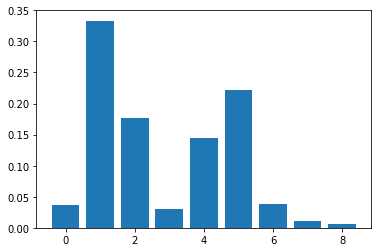

In [31]:
importance = classifier.feature_importances_
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature 1, i.e Clump thickness seems to be the highest weighted feature.